<a href="https://colab.research.google.com/github/duanasq/learning-ds-public/blob/main/block_dei_display.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualising representation of genders in tech from Block's public data

See: https://squareup.com/us/en/about/diversity/archive

Datasource: Data was crafted by hand by scraping the following URLs
- https://block.xyz/inclusion/workforce-data-2022
- https://squareup.com/us/en/about/diversity/workforce-data-2021
- https://squareup.com/us/en/about/diversity/archive/workforce-data-2020
- 2018 is missing
- https://squareup.com/us/en/about/diversity/archive/workforce-data-2019
- https://squareup.com/us/en/about/diversity/archive/workforce-data-2017



In [ ]:
import numpy as np
import pandas as pd
import json
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
df_tech = pd.DataFrame({
    "report_year": [2017, 2018, 2019, 2020, 2021, 2022],
    "non_binary" : [np.nan, np.nan, np.nan, 0.002, 0.003, 0.006],
    "women": [0.188, np.nan, 0.229, 0.232, 0.258, 0.29],
    "men": [0.812, np.nan, 0.771, 0.765, 0.739, 0.704]
})
df_tech

,report_year,non_binary,women,men
0,2017,NaN,0.188,0.812
1,2018,NaN,NaN,NaN
2,2019,NaN,0.229,0.771
3,2020,0.002,0.232,0.765
4,2021,0.003,0.258,0.739
5,2022,0.006,0.290,0.704


## Let's bar chart this up!

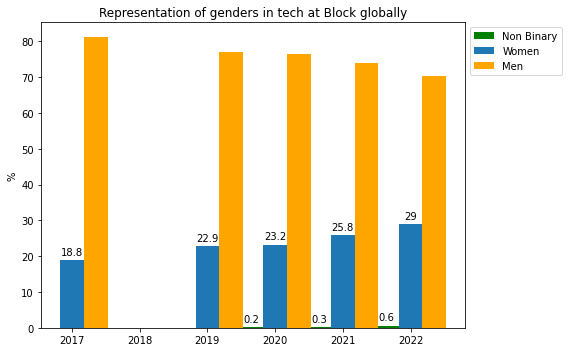

In [ ]:
labels = list(df_tech['report_year'])
labels = list(map(str, labels))

women_percentages = df_tech["women"].values * 100
non_binary_percentages = df_tech["non_binary"].values * 100
men_percentages = df_tech["men"].values * 100

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[8, 5])
rects1 = ax.bar(x - width, non_binary_percentages, width=width, label='Non Binary', color='green')
rects2 = ax.bar(x, women_percentages, width=width, label='Women', color='tab:blue')
rects3 = ax.bar(x + width, men_percentages, width=width, label='Men', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('Representation of genders in tech at Block globally')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(1, 1))

if(matplotlib.__version__ >= "3.4.0"):
  ax.bar_label(rects1, padding=3)
  ax.bar_label(rects2, padding=3)
else:
  def autolabel(rects):
      """Attach a text label above each bar in *rects*, displaying its height."""
      for rect in rects:
          height = rect.get_height()
          ax.annotate("{:.1f}".format(height),
                      xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom')


  autolabel(rects1)
  autolabel(rects2)

fig.tight_layout()

## Find the line of best fit!

This is a very simple prediction that assumes linear growth, and that is extrapolating far beyond the range of available data. Who knows, if we build enough momentum (having more women employees attracts more women employees), we might very well grow representation faster than linear!  … but there are always lots of hurdles we might encounter over the next decade as well.

(This paragraph quoted from a colleague.)

In [ ]:
df_tech_no_nans = df_tech.dropna(subset=['women'])
x = df_tech_no_nans["report_year"].values
y = df_tech_no_nans["women"].values * 100
(x,y)

(array([2017, 2019, 2020, 2021, 2022]), array([18.8, 22.9, 23.2, 25.8, 29. ]))

(0.0, 100.0)

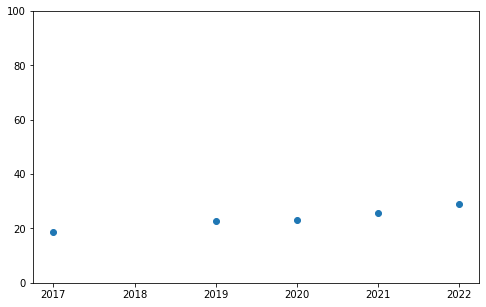

In [ ]:
import statsmodels.api as sm

fig, ax = plt.subplots(figsize=[8, 5])
ax.scatter(x,y)
ax.set_ylim(0,100)


In [ ]:
x_with_const = sm.add_constant(x)
model = sm.OLS(y, x_with_const)
results = model.fit()
#print(results.summary())
print(results.params)

[-3.85735135e+03  1.92162162e+00]


The first parameter is where the line crosses the y axis (so we had -3329% of women at the year 0) and the second parameter is the gradient (so we currently gain 1.66% representation of women a year).

In [110]:
# when do we reach balanced representation of women? Advice from a colleague: "Since we don't know how much of the population will choose to come out as nonbinary
# we can consider women genderbalanced with men when both groups are of equal amount (regardless of what that amount is).""
#
# For speculation, assuming a women=men percentage of 48%, when would we reach that?
x_women_balanced = (48 - results.params[0])/results.params[1]
x_women_balanced

2032.3206751054868

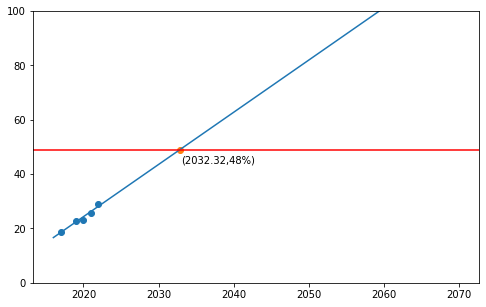

In [112]:
x2 = np.linspace(2016, 2070)
y2 = x2 * results.params[1] + results.params[0] 

fig, ax = plt.subplots(figsize=[8, 5])
ax.scatter(x,y)
ax.set(ylim=(0, 100))
ax.plot(x2, y2)
ax.axhline(y=49, color='r', linestyle='-')
ax.scatter([2032.84],[49])
ax.text(2033,44,'(2032.32,48%)')
plt.show()